In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import pinv
import itertools
import abc #abc is the abstract class
import HSP_SolvP as HSP
import HSP_M_loc as LOCM
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import os

In [ ]:
class SolvPred():
    
    def __init__(self, input_solv, db):
        self.pred = HSP.SolvPredictor(input_solv, db)

    def mix_pred(self, n = 2, rep_time = 50, std = 0.1, tol_pred = 1, red_tol = 0.01):
        self.pred.run_all(n, 18.0, 1.4, 2.0, rep_time = rep_time, std = std, tol = tol_pred, red_tol = red_tol)

sp = SolvPred(r'input_solv_sel_toluene.xlsx', r'db.xlsx')
sp.mix_pred()

['c:\\Users\\sh19129\\OneDrive - University of Bristol\\Documents\\MyProject\\ML\\HSP_python\\calculation\\cal_20220317_HSP_V2', 'Suihua_graphene_20220607']
c:\Users\sh19129\OneDrive - University of Bristol\Documents\MyProject\ML\HSP_python\calculation\cal_20220317_HSP_V2\Suihua_graphene_20220607\
(16.643097859800584, 11.724386681393218, 13.13019369916168)
Converge at 2764 iteration


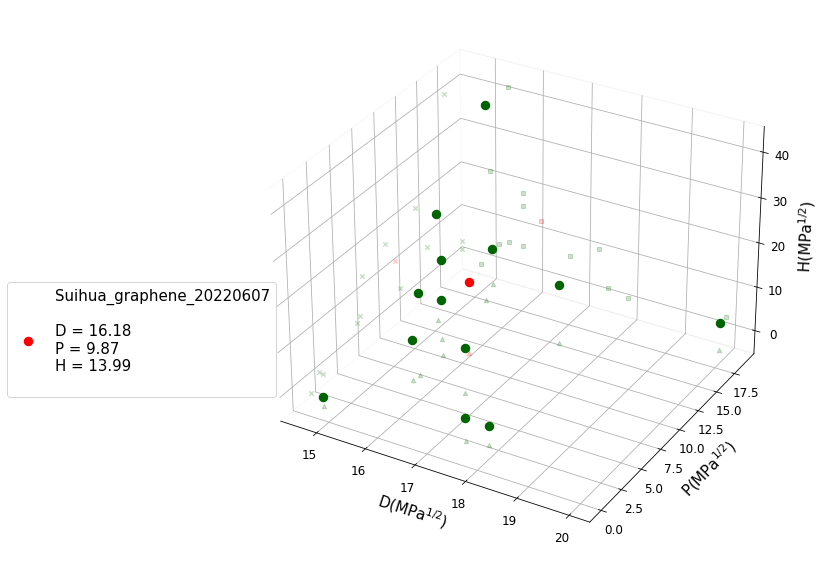

In [2]:
class MLocSolvPred():

    def __init__(self, exp_result, input_solv, db):
        self.mop = LOCM.MLoc(exp_result, db)
        print(self.mop.folder_path)
        self.pred = HSP.SolvPredictor(input_solv, db, folder_name = self.mop.folder_path)
    
    def run_all(self, alpha = 0.001, n_max = 1000000, tol_mop = 0.0001, n = 3, rep_time = 50, std = 0.1, tol_pred = 0.1, red_tol = 0.01):
        cord_result = self.mop.run_all(alpha = alpha, n_max = n_max, tol = tol_mop)
        self.pred.run_all(n, cord_result[0][0], cord_result[0][1], cord_result[0][2], rep_time = rep_time, std = std, tol = tol_pred, red_tol = red_tol)

mp = MLocSolvPred(r'input_Suihua_graphene_20220607.xlsx', r'input_solv_sel.xlsx', r'db.xlsx')
mp.run_all()